In [32]:
# !pip --q install pandas seaborn matplotlib scikit-learn numpy scipy statsmodels openpyxl xlrd plotly

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import statsmodels as sm
from datetime import datetime, timedelta

In [34]:
df = pd.read_excel('2025 Feb Data for recruitment task (1).xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   ISBN                                          4698 non-null   int64         
 1   Product title                                 4698 non-null   object        
 2   Brand                                         4698 non-null   object        
 3   Pub Date                                      4698 non-null   datetime64[ns]
 4   Retailer sales out last week                  4698 non-null   int64         
 5   Retailer number of units in stock             4698 non-null   int64         
 6   Retailer projected weeks of stock on Hand     2900 non-null   float64       
 7   Number of units reatiler has ordered from DK  4698 non-null   int64         
 8   Current number of units in DK warehouse       4698 non-null   int64 

In [35]:
df.head()

,ISBN,Product title,Brand,Pub Date,Retailer sales out last week,Retailer number of units in stock,Retailer projected weeks of stock on Hand,Number of units reatiler has ordered from DK,Current number of units in DK warehouse,Print status,Current Preorders total,Reprint Quantity,Reprint Date,Forecast sales for this week,Forecast sales for next 4 weeks,Forecast sales for next 12 weeks
0,9780241734612,The Magic Balloon: World Book Day 2025,DK Children 0-9,2025-02-06,1947,1066,0.868003,0,950,Reprint under Review,,,NaT,1197.0,3185.0,6747.0
1,9781464221361,Never Lie: From the Sunday Times Bestselling A...,DK Other,2023-12-05,1753,2518,1.611930,0,10365,Reprinting,,,NaT,1492.0,3517.0,7598.0
2,9781464228636,The Crash: The #1 Sunday Times Bestseller! A P...,DK Other,2025-01-28,1597,3850,2.610246,1,20468,In Print,,,NaT,1542.0,5667.0,12154.0
3,9781464228599,The Perfect Son: From the Sunday Times Bestsel...,DK Other,2024-08-06,1488,1706,1.714936,1,5098,In Print,,,NaT,1098.0,2757.0,5505.0
4,9780241740859,LEGO Our Amazing Universe: World Book Day 2025...,DK Licensing,2025-02-06,1365,1214,1.328540,2012,3991,In Print,,3000,2025-01-10,904.0,2140.0,4424.0


In [36]:
# df['Reprint Date ']
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

In [37]:
# Automated inventory report
inventory_report = df.groupby("Brand").agg({
    "Retailer sales out last week": "sum",
    "Retailer number of units in stock": "sum",
    "Current number of units in DK warehouse": "sum",
    "Forecast sales for next 4 weeks": "sum"
}).reset_index()

# Create stock risk column

In [38]:
# AI risk model for stock prediction
df["Stock Risk"] = np.where(
    (df["Retailer number of units in stock"] + df["Current number of units in DK warehouse"]) < df["Forecast sales for next 4 weeks"],
    "High", "Low"
)

In [39]:
# Save report to CSV
inventory_report.to_csv("automated_inventory_report.csv", index=False)

/var/folders/gg/9r5r1_cx0j332ldkpzq14jfw0000gn/T/ipykernel_63613/1779786587.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



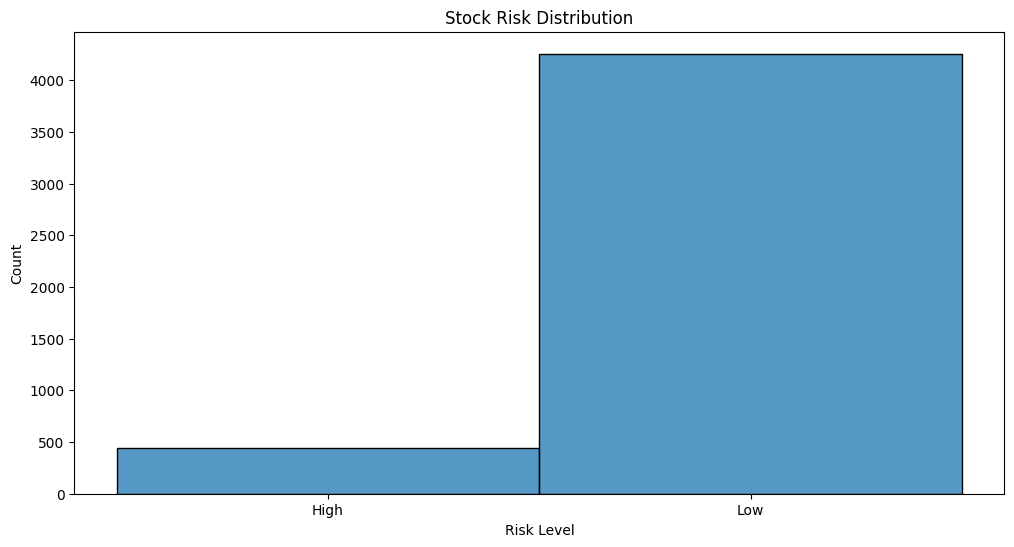

In [40]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(df["Stock Risk"], bins=2, kde=False, palette="coolwarm")
plt.title("Stock Risk Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()


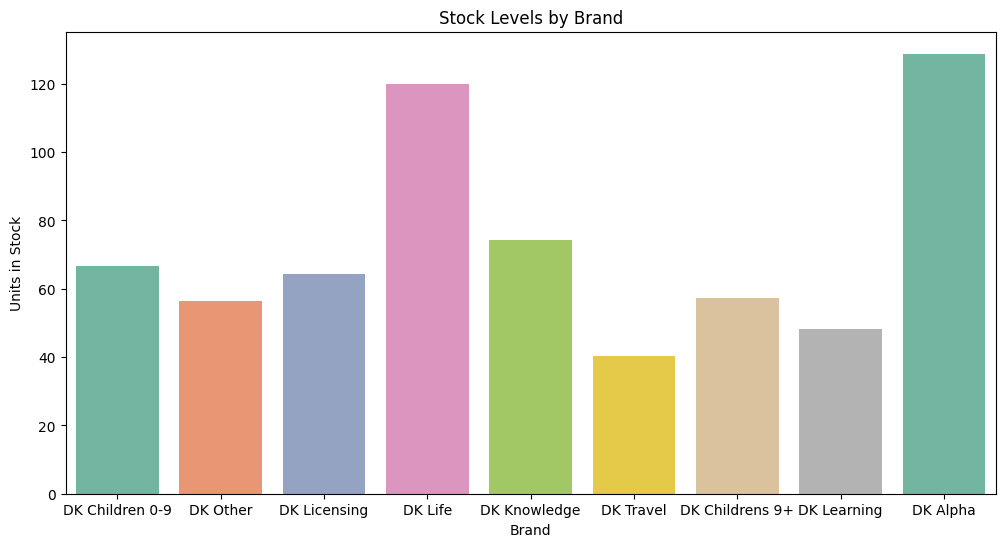

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Brand", y="Retailer number of units in stock", data=df, errorbar=None, palette="Set2", hue="Brand", legend=False)
plt.title("Stock Levels by Brand")
plt.xlabel("Brand")
plt.ylabel("Units in Stock")
plt.show()

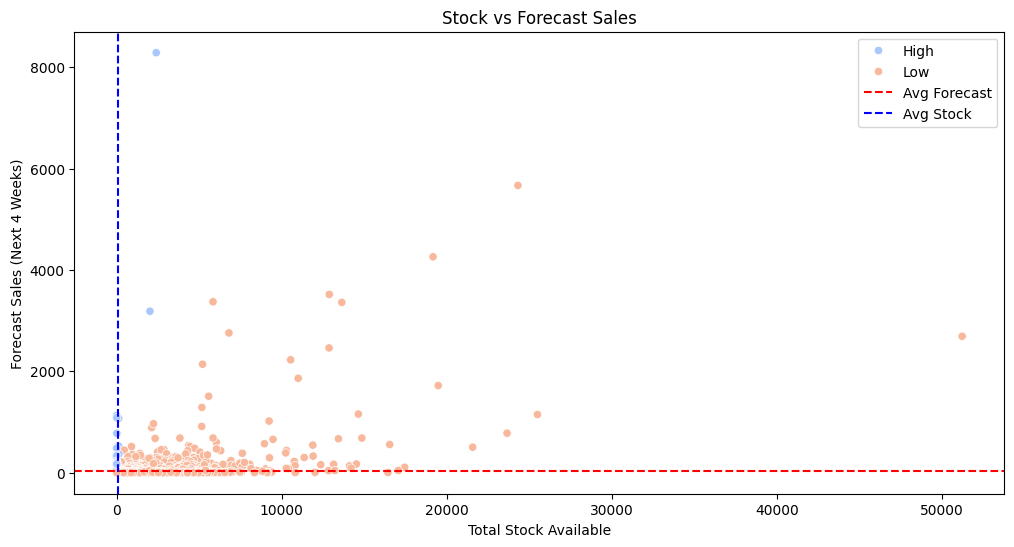

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Retailer number of units in stock"] + df["Current number of units in DK warehouse"],
                y=df["Forecast sales for next 4 weeks"], hue=df["Stock Risk"], palette="coolwarm")
plt.axhline(y=df["Forecast sales for next 4 weeks"].mean(), color='red', linestyle='--', label="Avg Forecast")
plt.axvline(x=df["Retailer number of units in stock"].mean(), color='blue', linestyle='--', label="Avg Stock")
plt.title("Stock vs Forecast Sales")
plt.xlabel("Total Stock Available")
plt.ylabel("Forecast Sales (Next 4 Weeks)")
plt.legend()
plt.show()


In [43]:
import plotly.express as px

# Create a new column for hover information
df["Hover Info"] = df["ISBN"].astype(str) + "<br>" + df["Product title"]

# Create interactive scatter plot
fig = px.scatter(df, 
                 x=df["Retailer number of units in stock"] + df["Current number of units in DK warehouse"],
                 y=df["Forecast sales for next 4 weeks"], 
                 color=df["Stock Risk"], 
                 hover_data=["ISBN", "Product title"], 
                 title="Stock vs Forecast Sales")

fig.update_layout(xaxis_title="Total Stock Available",
                  yaxis_title="Forecast Sales (Next 4 Weeks)")

# Show the interactive plot
fig.show()

In [44]:
# Display sample data and risk assessment
df[["ISBN", 
    "Product title", 
    "Retailer number of units in stock", 
    "Current number of units in DK warehouse", 
    "Forecast sales for next 4 weeks", "Stock Risk"]].head()


,ISBN,Product title,Retailer number of units in stock,Current number of units in DK warehouse,Forecast sales for next 4 weeks,Stock Risk
0,9780241734612,The Magic Balloon: World Book Day 2025,1066,950,3185.0,High
1,9781464221361,Never Lie: From the Sunday Times Bestselling A...,2518,10365,3517.0,Low
2,9781464228636,The Crash: The #1 Sunday Times Bestseller! A P...,3850,20468,5667.0,Low
3,9781464228599,The Perfect Son: From the Sunday Times Bestsel...,1706,5098,2757.0,Low
4,9780241740859,LEGO Our Amazing Universe: World Book Day 2025...,1214,3991,2140.0,Low


In [45]:
df.drop(columns=["Hover Info"]).to_csv("inventory_data_with_risk.csv", index=False)

What are the top 5 selling books this week and what is the retailer stock inventory for each of them?

In [49]:
df.sort_values(by="Forecast sales for this week", ascending=False)[["Product title", "Retailer number of units in stock"]].head(5)


,Product title,Retailer number of units in stock
7,How to Design a Garden: Create and Maintain Yo...,2397
2,The Crash: The #1 Sunday Times Bestseller! A P...,3850
1,Never Lie: From the Sunday Times Bestselling A...,2518
0,The Magic Balloon: World Book Day 2025,1066
6,The Housemaid Is Watching: An Instant Sunday T...,7265
